In [74]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier

In [75]:
df=pd.read_csv('IRIS.csv')

In [76]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [77]:
df.tail()

,sepal_length,sepal_width,petal_length,petal_width,species
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [78]:
df.shape

(150, 5)

In [79]:
df.isna().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [80]:
df.isnull()

,sepal_length,sepal_width,petal_length,petal_width,species
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
145,False,False,False,False,False
146,False,False,False,False,False
147,False,False,False,False,False
148,False,False,False,False,False


<BarContainer object of 150 artists>

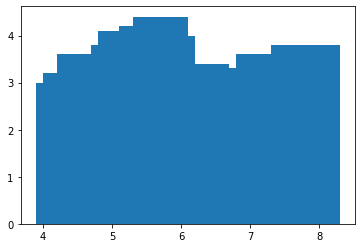

In [81]:
X = df.sepal_length
Y = df.sepal_width
plt.bar(X,Y)

([<matplotlib.patches.Wedge at 0x7f0f5d63c910>,
 [Text(1.0998162248289156, 0.020106506486022895, ''),
  Text(1.0983893303845753, 0.059505284616782936, ''),
  Text(1.0956920682406373, 0.0972568331509659, ''),
  Text(1.091842090596001, 0.1337192925607762, ''),
  Text(1.0865955946241563, 0.17120167564418406, ''),
  Text(1.0794604973247504, 0.21157749104146875, ''),
  Text(1.0711853524326178, 0.25012385078958144, ''),
  Text(1.061946535861541, 0.2868266984987159, ''),
  Text(1.051681945368862, 0.322436173195822, ''),
  Text(1.0403517900227819, 0.35730680513585744, ''),
  Text(1.0264549462634536, 0.39546206302411735, ''),
  Text(1.0113144459682202, 0.4327159476792971, ''),
  Text(0.9958295372217366, 0.4672510383046166, ''),
  Text(0.9800624176136543, 0.4994773844542706, ''),
  Text(0.9613427184591771, 0.5346215274991455, ''),
  Text(0.9384959352390051, 0.5737816479636355, ''),
  Text(0.9149313166628202, 0.6106559471499793, ''),
  Text(0.8913070906159923, 0.644648485779386, ''),
  Text(0.865

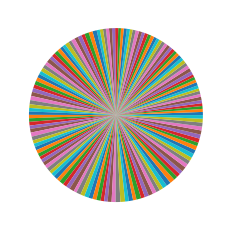

In [82]:
X = df.sepal_length
plt.pie(X)

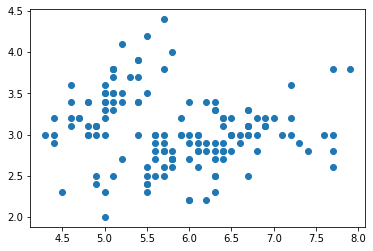

In [83]:
X = df.sepal_length
Y = df.sepal_width
plt.scatter(X,Y)

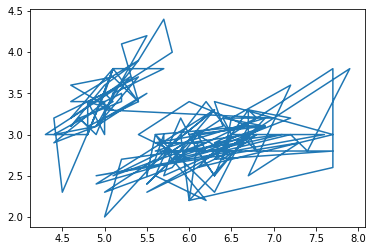

In [84]:
X = df.sepal_length
Y = df.sepal_width
plt.plot(X,Y)

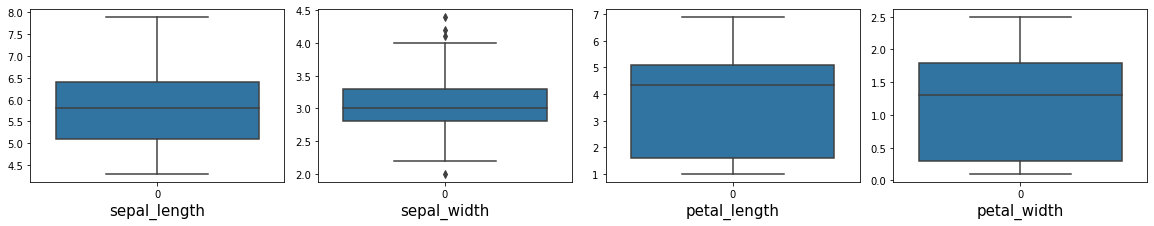

In [85]:

plt.figure(figsize=(20,15))
plotnumber = 1

for col in df.columns:
  if plotnumber <=4:
    ax=plt.subplot(5,5,plotnumber)
    sns.boxplot(df[col])
    plt.xlabel(col, fontsize = 15)

  plotnumber += 1
plt.tight_layout()
plt.show()

(array([ 4.,  7., 22., 24., 38., 31.,  9., 11.,  2.,  2.]),
 array([2.  , 2.24, 2.48, 2.72, 2.96, 3.2 , 3.44, 3.68, 3.92, 4.16, 4.4 ]),
 <BarContainer object of 10 artists>)

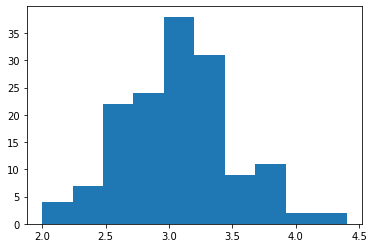

In [86]:
Y = df.sepal_width
plt.hist(Y)

In [87]:
df.info

<bound method DataFrame.info of      sepal_length  sepal_width  petal_length  petal_width         species
0             5.1          3.5           1.4          0.2     Iris-setosa
1             4.9          3.0           1.4          0.2     Iris-setosa
2             4.7          3.2           1.3          0.2     Iris-setosa
3             4.6          3.1           1.5          0.2     Iris-setosa
4             5.0          3.6           1.4          0.2     Iris-setosa
..            ...          ...           ...          ...             ...
145           6.7          3.0           5.2          2.3  Iris-virginica
146           6.3          2.5           5.0          1.9  Iris-virginica
147           6.5          3.0           5.2          2.0  Iris-virginica
148           6.2          3.4           5.4          2.3  Iris-virginica
149           5.9          3.0           5.1          1.8  Iris-virginica

[150 rows x 5 columns]>

<function matplotlib.pyplot.show(close=None, block=None)>

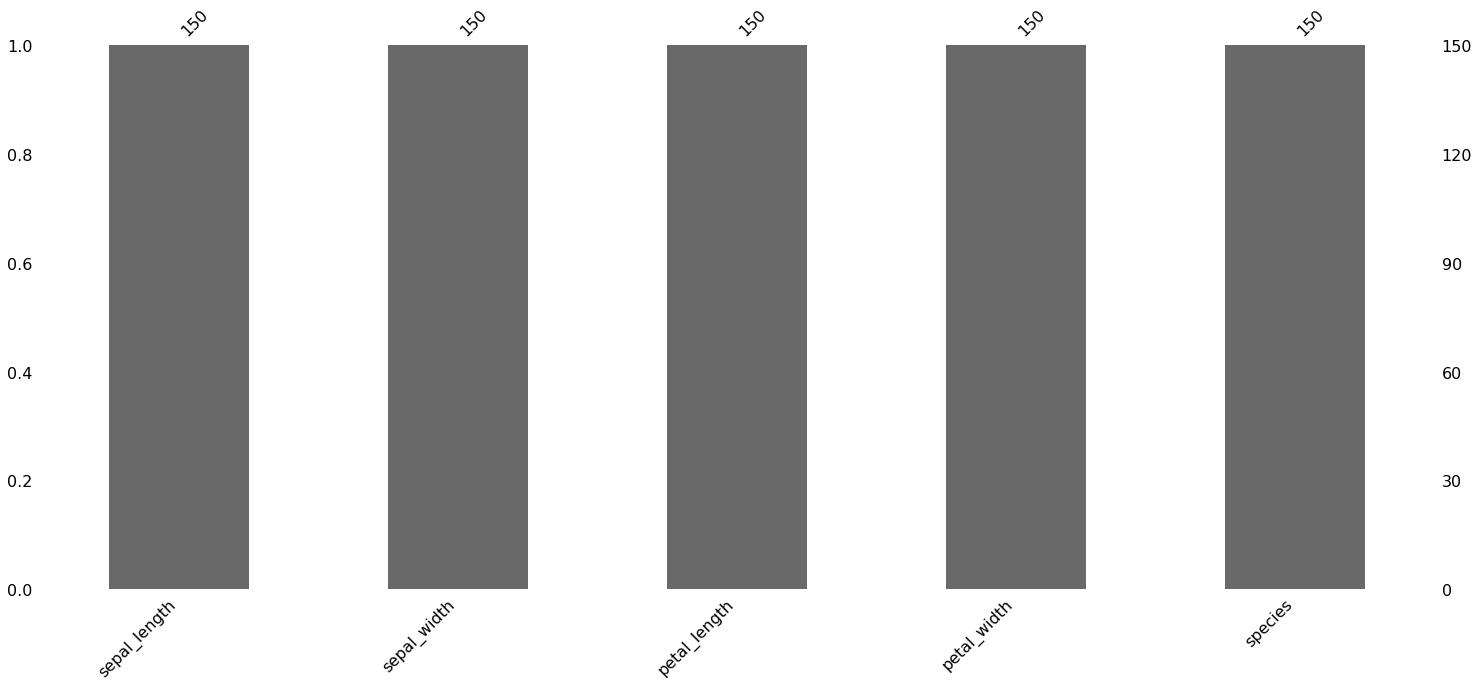

In [88]:
import missingno as mn
mn.bar(df)
plt.show

In [89]:
X = df.drop('species', axis=1)
Y= df.species

In [90]:
X_train, X_test, Y_train, Y_test=train_test_split(X,Y,test_size = 0.4, random_state = 0)

In [91]:
a = StandardScaler()
X_train = a.fit_transform(X_train)
X_test = a.transform(X_test)

In [92]:
classifier = KNeighborsClassifier(n_neighbors = 5)
classifier.fit(X_train, Y_train)+ 

KNeighborsClassifier()

In [93]:
Y_pred = classifier.predict(X_test)

In [94]:
cm = confusion_matrix(Y_test,Y_pred)
cm

array([[16,  0,  0],
       [ 0, 22,  1],
       [ 0,  3, 18]])

In [95]:
accuracy_score(Y_test, Y_pred)

0.9333333333333333

In [97]:
print("Precision :",metrics.precision_score(Y_test,Y_pred,average='micro'))
print("Recall : ",metrics.recall_score(Y_test, Y_pred,average='micro'))

Precision : 0.9333333333333333
Recall :  0.9333333333333333
